In [2]:
asset_list = ['AAPL']

In [3]:
import pandas
import math
import os
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

c:\Users\kahbe\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
folder_path = "..\Data Collection & Processing\historical_prices_data" 
forecasts_folder = "..\Data Collection & Processing\stock_forecasts"
performance_folder = "..\Data Collection & Processing\stock_performance"

for asset in asset_list: 
  file_path = os.path.join(folder_path, f"{asset}.csv")
  # Import the top 25 sp500 stocks dataset into a Pandas Dataframe
  df = pd.read_csv(
    file_path,  
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
  )

In [15]:
# # Create a new dataframe with only the 'Close column
# data = df.filter(['Close'])
# data.head()
df = df.reset_index()
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-11,18.950357,19.205357,18.910713,19.141430,16.860064,282256800
1,2014-02-12,19.176786,19.270000,19.044287,19.139999,16.858810,308100800
2,2014-02-13,19.094999,19.458929,19.078571,19.443930,17.126516,307398000
3,2014-02-14,19.373928,19.499287,19.328930,19.428213,17.112673,272924400
4,2014-02-18,19.500000,19.685356,19.486071,19.499643,17.175587,260251600
...,...,...,...,...,...,...,...
2512,2024-02-05,188.149994,189.250000,185.839996,187.679993,187.440811,69668800
2513,2024-02-06,186.860001,189.309998,186.770004,189.300003,189.058762,43490800
2514,2024-02-07,190.639999,191.050003,188.610001,189.410004,189.168625,53439000
2515,2024-02-08,189.389999,189.539993,187.350006,188.320007,188.080017,40962000


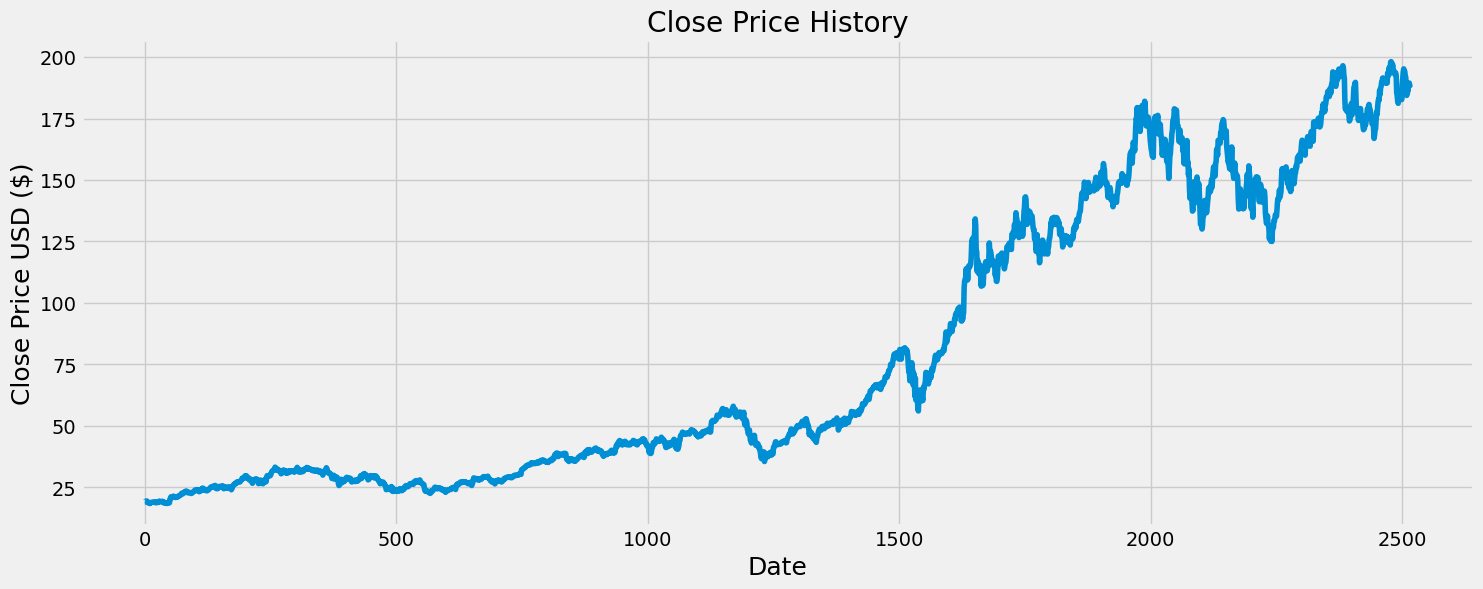

In [16]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

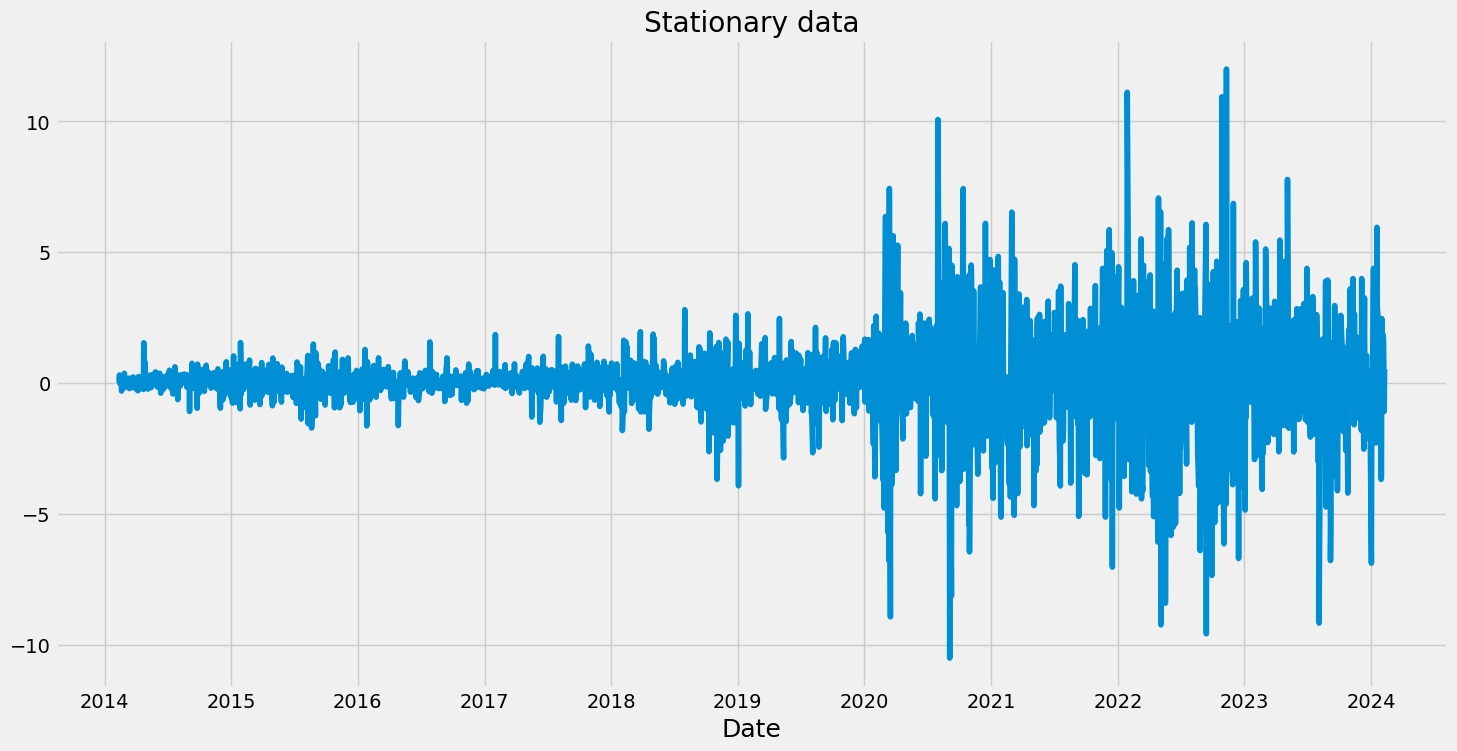

In [17]:
df['Close Shift'] = df['Close'] - df['Close'].shift(1)
y = df['Close Shift']

plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close Shift'])
plt.title('Stationary data')
plt.xlabel('Date', fontsize=18)
plt.show()

In [18]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Close Shift'],
      dtype='object')

In [30]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close Shift'])
print(data)
data = data.dropna()

# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

      Close Shift
0             NaN
1       -0.001431
2        0.303930
3       -0.015717
4        0.071430
...           ...
2512     1.829987
2513     1.620010
2514     0.110001
2515    -1.089996
2516     0.529999

[2517 rows x 1 columns]


2013

In [31]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data
     

array([[0.46707672],
       [0.48063626],
       [0.46644235],
       ...,
       [0.47202482],
       [0.41873897],
       [0.49067483]])

In [32]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.46707672, 0.48063626, 0.46644235, 0.4703121 , 0.45346983,
       0.45727598, 0.45778347, 0.47078775, 0.45843377, 0.45967067,
       0.48350668, 0.46487243, 0.46955077, 0.4726591 , 0.46891648,
       0.46458692, 0.46664867, 0.46790149, 0.47533922, 0.46796492,
       0.45768836, 0.45768836, 0.47039129, 0.47453046, 0.46691825,
       0.46308035, 0.47375337, 0.47716314, 0.47633837, 0.45887774,
       0.46346097, 0.46618868, 0.46695001, 0.47492692, 0.46856753,
       0.46117732, 0.45608651, 0.45389806, 0.46709273, 0.47805117,
       0.45629274, 0.46100285, 0.47042305, 0.46124067, 0.46880544,
       0.47654452, 0.47702043, 0.46798076, 0.45611827, 0.53536531,
       0.47375346, 0.50226773, 0.46434901, 0.46358785, 0.4693447 ,
       0.46888463, 0.48043002, 0.45675273, 0.46384151, 0.46025752])]
[0.4632548214765459]

[array([0.46707672, 0.48063626, 0.46644235, 0.4703121 , 0.45346983,
       0.45727598, 0.45778347, 0.47078775, 0.45843377, 0.45967067,
       0.48350668, 0.46487243, 0.469

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0478 - val_loss: 0.0136
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0016 - val_loss: 0.0134
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0017 - val_loss: 0.0134
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0015 - val_loss: 0.0133
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0016 - val_loss: 0.0134
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0013 - val_loss: 0.0134
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0016 - val_loss: 0.0133
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0018 - val_loss: 0.0133
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0017 - val_loss: 0.0133
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0014 - val_loss: 0.0134
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0018 - val_loss: 0.0133
Epoch 12/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step

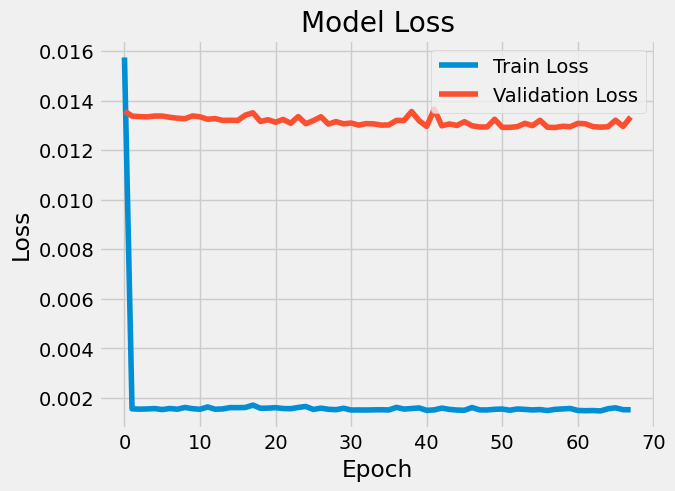

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# Assuming x_train and y_train are already defined and preprocessed properly

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Set up early stopping to monitor the 'val_loss' to stop training when the validation loss has not improved for 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with a validation split of 20%
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [35]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

mse = np.mean((predictions - y_test) ** 2)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
mse, rmse

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


(8.022323069740741, 0.20963901238956645)

C:\Users\kahbe\AppData\Local\Temp\ipykernel_17908\942921321.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


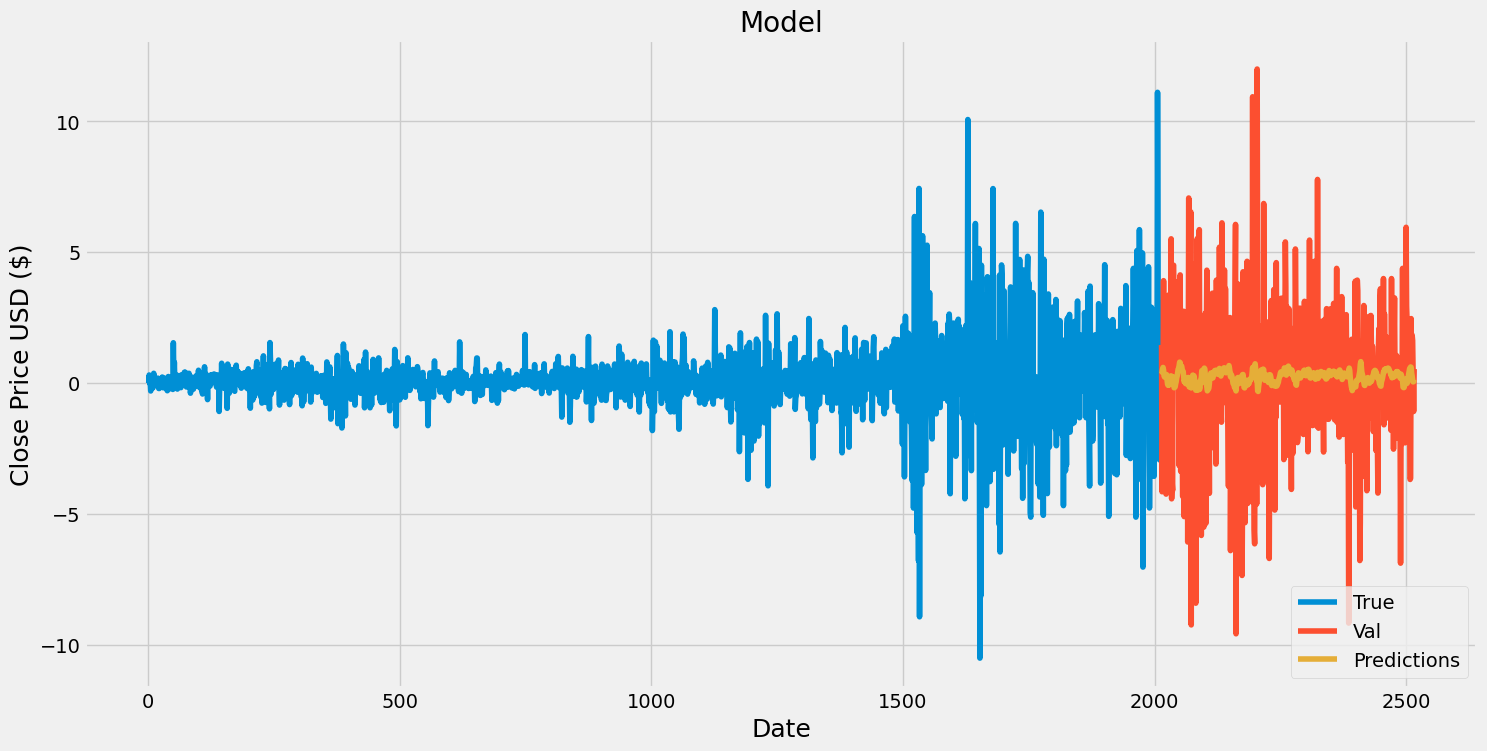

In [39]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close Shift'])
plt.plot(valid[['Close Shift','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()